In [8]:
# Initialization for this notebook.

import numpy as np
import matplotlib.pyplot as plt

# Un-comment the following line to use interactive matplotlib widget.
#%matplotlib widget

# 1.1 离散时间信号———序列

## 1.1.1 序列

$$ x(n)=x_a(t)|_{t=nT}=x_a(nT) $$

序列在计算机程序中，通常使用数组来实现。例如，在Python中实现 $ x(n)=\{-5, -3, \underline{-1}, 0, 2, 7, 9\} $ 可以是：

In [9]:
x = np.array([-5, -3, -1, 0, 2, 7, 9])
print("x =", x)

x = [-5 -3 -1  0  2  7  9]


In [10]:
# Pay close attention to the values!
print(x[-1], x[0], x[1])

9 -5 -3


理论的序列，下标取值范围是**整个整数集合**。但在大多数计算机语言中，数组的下标是**从一个固定的数值开始**。如Python/C/C++/Java等是从0开始，MATLAB是从1开始。因此，要特别小心下标的正确转换。

一种常见解决方法是，为序列记录下它 $n=0$ 时对应的数组下标，称为（$n$ 的）偏移量(offset)。这样，理论上序列的值$x(n)$就和数组值`x[n+noff]`相对应了。

In [11]:
# Define a sequence and it's offset.
x = np.array([-5, -3, -1, 0, 2, 7, 9])
noff_x = 2  # Offset of n for sequence x. Meaning x[noff_x] is x(n=0).

print("x =", x, ", noff_x =", noff_x)
print("[x_n(-1), x_n(0), x_n(1)] = [", x[-1+noff_x], x[0+noff_x], x[1+noff_x], "]")

x = [-5 -3 -1  0  2  7  9] , noff_x = 2
[x_n(-1), x_n(0), x_n(1)] = [ -3 -1 0 ]


In [12]:
# To get the "theoretical" x(n).
# Note: As a function, it can only "get", not "set" the value!
x_n = lambda n: x[n +noff_x]

print("x =", x, ", noff_x =", noff_x)
print("[x_n(-1), x_n(0), x_n(1)] = [", x_n(-1), x_n(0), x_n(1), "]")

x = [-5 -3 -1  0  2  7  9] , noff_x = 2
[x_n(-1), x_n(0), x_n(1)] = [ -3 -1 0 ]


In [13]:
# Returns a n seqence based on the offset provided.
seq_n = lambda seq, noff: np.arange(seq.size) - noff

print("x   =", x)
print("n_x =", seq_n(x, noff_x))

x   = [-5 -3 -1  0  2  7  9]
n_x = [-2 -1  0  1  2  3  4]


Text(0, 0.5, 'x(n)')

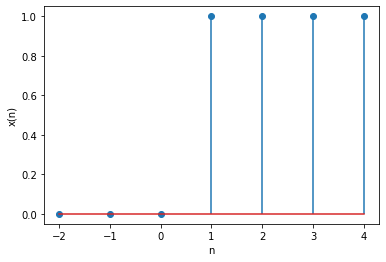

In [22]:
# seq_n() is especially useful when plotting a sequence.
fig, ax = plt.subplots()
ax.stem(seq_n(x, noff_x), x)
ax.set_xlabel('n')
ax.set_ylabel('x(n)')

对于有规律的序列，如：
$$ x(n) = a^n $$
我们通常采用编程的方式来产生。需要注意，一般情况下计算机只分析处理有限长度的序列。因此，我们往往会在程序中限定 $n$ 的取值范围，并近似认为序列是有限长序列。

x = [4.    2.    1.    0.5   0.25  0.125] , noff_x = 2


Text(0.5, 1.0, 'x(n) = a^n')

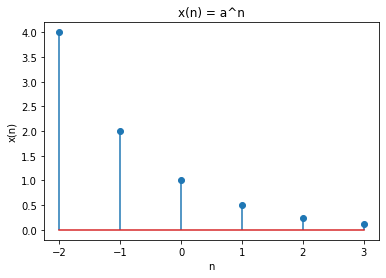

In [15]:
# Parameters
(n_min, n_max) = (-2, 3)    # The range of n
a = 0.5

# Generate the sequence
x = np.array([a**n for n in range(n_min, n_max+1)])  # As the stop of range is omitted
noff_x = 0 - n_min          # As 0 is the start of the array, 0 minus n_min produce the offset between two origin

print("x =", x, ", noff_x =", noff_x)

# Plot the sequence
fig, ax = plt.subplots()
ax.stem(seq_n(x, noff_x), x)
ax.set_xlabel('n')
ax.set_ylabel('x(n)')
ax.set_title('x(n) = a^n')

试生成以下序列：
$$
\delta(n) = \begin{cases}
    1, n=0  \\
    0, n \neq 0  
\end{cases}
$$

Text(0.5, 1.0, 'x(n) = Impulse Function')

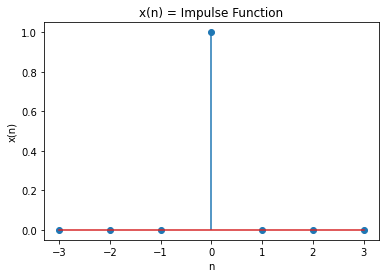

In [20]:
# Impulse Function
def impulse(n): return 1 if (n == 0) else 0

# Create seq range
(nMin, nMax) = (-3, 3)

# Generate the sequence
seqImpulse = np.array([impulse(n) for n in range(nMin, nMax+1)])
# Calculate the offset between two origin
offsetOrigin = 0 - nMin

# Plot sequence
figure, axe = plt.subplots()
# Create a stem plot
axe.stem(seq_n(seqImpulse, offsetOrigin), seqImpulse)
# Set label of the X axis
axe.set_xlabel('n')
# Set label of the Y axis
axe.set_ylabel('x(n)')
# Set title of the plot
axe.set_title('x(n) = Impulse Function')

试生成以下序列：
$$
u(n) = \begin{cases}
    1, n \geqslant 0  \\
    0, n < 0  
\end{cases}
$$

Text(0.5, 1.0, 'x(n) = Step Function')

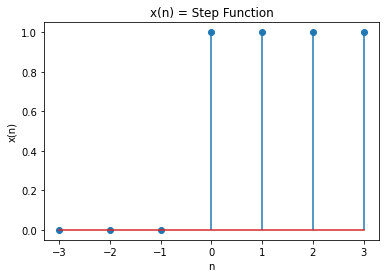

In [21]:
# Step Function
def step(n): return 1 if (n >= 0) else 0

# Create seq range
(nMin, nMax) = (-3, 3)

# Generate the sequence
seqStep = np.array([step(n) for n in range(nMin, nMax+1)])
# Calculate the offset between two origin
offsetOrigin = 0 - nMin

# Plot sequence
figure, axe = plt.subplots()
# Create a stem plot
axe.stem(seq_n(seqStep, offsetOrigin), seqStep)
# Set label of the X axis
axe.set_xlabel('n')
# Set label of the Y axis
axe.set_ylabel('x(n)')
# Set title of the plot
axe.set_title('x(n) = Step Function')

试生成以下序列：
$$
R_N(n) = \begin{cases}
    1, 0 \leqslant n \leqslant N-1  \\
    0, \text{其他}n
\end{cases}
$$
$N$为大于0的整数

Text(0.5, 1.0, 'x(n) = R_N Function')

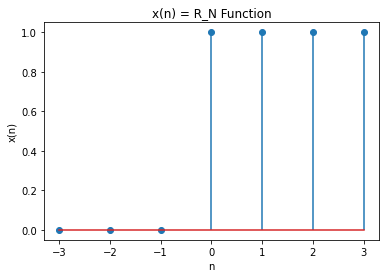

In [23]:
# R_N Function
def R_N(n): return 1 if (n >= 0) else 0

# Create seq range
(nMin, nMax) = (-3, 3)

# Generate the sequence
seqR_N = np.array([R_N(n) for n in range(nMin, nMax+1)])
# Calculate the offset between two origin
offsetOrigin = 0 - nMin

# Plot sequence
figure, axe = plt.subplots()
# Create a stem plot
axe.stem(seq_n(seqR_N, offsetOrigin), seqR_N)
# Set label of the X axis
axe.set_xlabel('n')
# Set label of the Y axis
axe.set_ylabel('x(n)')
# Set title of the plot
axe.set_title('x(n) = R_N Function')